In [128]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [117]:
# helper functions
def is_float(str):
    try:
        float(str)
        return True
    except ValueError:
        return False

In [157]:
# read input
import csv

filename = "data/ODI-2018_clean.csv"

df = pd.read_csv(filename)

with open(filename,'r') as csvfile:
    # Set the right quote character and delimiter
    csv_contents = [{k: v for k, v in row.items()}
        for row in csv.DictReader(csvfile, skipinitialspace=True, quotechar='"', delimiter=',')]

print("columns:")#, sorted(csv_contents[0].keys()))
col_no = 0
for col in sorted(csv_contents[0].keys()):
    print(col_no, col)
    col_no += 1

columns:
0 Timestamp
1 bed_time
2 birthday
3 chocolate_effect
4 course_db
5 course_ir
6 course_ml
7 course_stat
8 gender
9 good_day1
10 good_day2
11 money
12 num_neighbors
13 program
14 random_number
15 stand_up


In [141]:
#records
print("There are {} records".format(len(csv_contents)))
#attributes
print("There are {} attributes".format(len(csv_contents[0])))
#range of values
print("eens kijken of dit werkt")
#distribution of values
#relationships between attributes
#so on

There are 203 records
There are 16 attributes
eens kijken of dit werkt


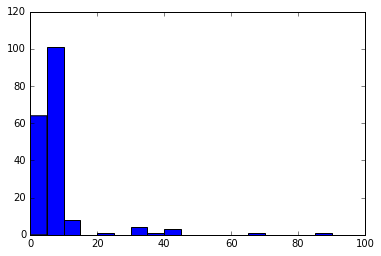

In [143]:
random_numbers = [csv_contents[x]["random_number"] for x in range(len(csv_contents))]
plt.hist(np.array([float(x) for x in random_numbers if is_float(x)]), np.arange(0,100,5))
plt.show()

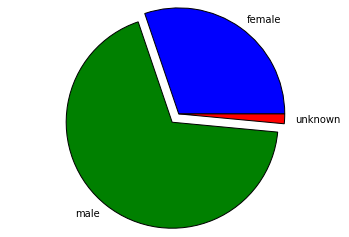

In [144]:
# pie chart of gender distribution
genders = [csv_contents[x]["gender"] for x in range(len(csv_contents))]
labels = sorted([x for x in set(genders) if len(x) > 0])
sizes = [genders.count(label) for label in labels]
explode = tuple(0.1 if s == max(sizes) else 0.0 for s in sizes)
plt.pie(sizes, explode=explode, labels=labels)
plt.axis('equal')
plt.show()

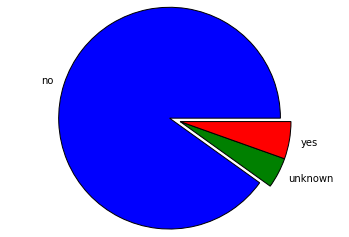

In [145]:
# pie chart of gender distribution
stood_up = [csv_contents[x]["stand_up"] for x in range(len(csv_contents))]
labels = sorted([x for x in set(stood_up) if len(x) > 0])
sizes = [stood_up.count(label) for label in labels]
explode = tuple(0.1 if s == max(sizes) else 0.0 for s in sizes)
plt.pie(sizes, explode=explode, labels=labels)
plt.axis('equal')
plt.show()

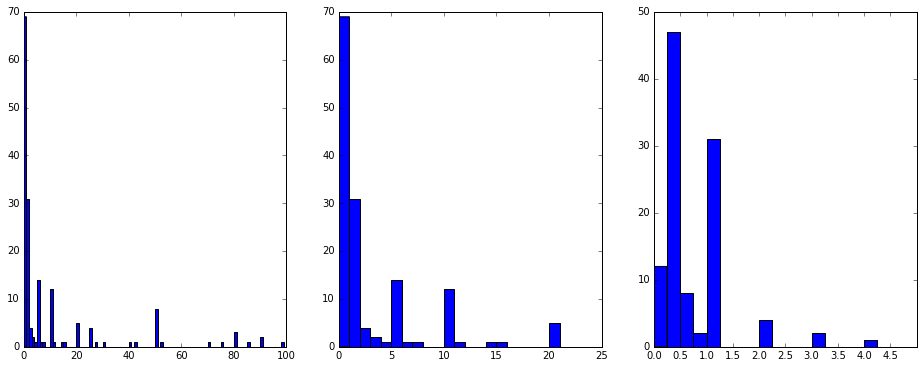

In [146]:
# plots of the competion answers
comp_numbers = [csv_contents[x]["money"] for x in range(len(csv_contents))]
plt.figure(figsize=(16,6))
plt.subplot(131)
plt.hist(np.array([float(x) for x in comp_numbers if is_float(x)]), np.arange(0,100,1))
plt.subplot(132)
plt.hist(np.array([float(x) for x in comp_numbers if is_float(x)]), np.arange(0,25,1))
plt.subplot(133)
plt.hist(np.array([float(x) for x in comp_numbers if is_float(x)]), np.arange(0,5,.25))
plt.xticks(np.arange(0,5,.5))
plt.show()

In [151]:
df.describe()

,Timestamp,program,course_ml,course_ir,course_stat,course_db,gender,chocolate_effect,birthday,num_neighbors,stand_up,money,random_number,bed_time,good_day1,good_day2
count,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202
unique,98,16,3,3,3,3,3,5,197,23,3,47,38,56,67,81
top,4/5/2018 11:27:35,Artificial Intelligence,yes,no,yes,no,male,fat,xx-xx-1995,1,no,1,7,01:00,Good weather,Good weather
freq,8,45,111,124,176,101,138,69,2,36,182,31,33,25,39,18


In [159]:
# data = pd.concat([df['gender'], df['num_neighbors']], axis=1)
# data.plot.scatter(x='num_neighbors', y='gender', ylim=(0,800000));
df.shape()

TypeError: 'tuple' object is not callable

In [172]:
things = set()
for thing in df['good_day1']:
    things.add(thing)
for thing in df['good_day2']:
    things.add(thing)
print(len(things))

124


In [181]:
df['program'].value_counts()

Artificial Intelligence                             45
Business Analytics                                  42
Bioinformatics and Systems Biology                  26
Computational Science                               23
Computer Science                                    21
Econometrics and Operations Research                20
Finance                                             11
Mathematics                                          4
PhD                                                  3
Economics                                            1
Science, Business & Innovation                       1
Management, Policy Analysis and Entrepreneurship     1
Human Movement Science                               1
Physics                                              1
Artificial intelligence                              1
Drug Discovery and Safety                            1
Name: program, dtype: int64

In [191]:
for col in df.columns:
    for thing in df[col].value_counts():
        if thing == 47:
            print( df[col].value_counts() )
            continue